# Ford GoBike Dataset Exploration
## by Adriana Zurawska

## Preliminary Wrangling

> The data set holds information on bike-sharing service in San Francisco Bay area. The data was collected over 18 months and there are multiple files that need to be downoladed and joined together in order to perform analysis. The data collected by GoBike consists of bike ID, user demographics, trip start and end timeas well as start and end station.

In [1]:
# import all packages and set plots to be embedded inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#loading all parts of the dataset
%time 

df =pd.read_csv('./2017-fordgobike-tripdata.csv')
df_1 =pd.read_csv('201801-fordgobike-tripdata.csv')
df_2 =pd.read_csv('201802-fordgobike-tripdata.csv')
df_3 =pd.read_csv('201803-fordgobike-tripdata.csv')
df_4 =pd.read_csv('201804-fordgobike-tripdata.csv')
df_5 =pd.read_csv('201805-fordgobike-tripdata.csv')
df_6 =pd.read_csv('201806-fordgobike-tripdata.csv')
df_7 =pd.read_csv('201807-fordgobike-tripdata.csv')
df_8 =pd.read_csv('201808-fordgobike-tripdata.csv')
df_9 =pd.read_csv('201809-fordgobike-tripdata.csv')
df_10 =pd.read_csv('201810-fordgobike-tripdata.csv')
df_11 =pd.read_csv('201811-fordgobike-tripdata.csv')

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs


In [3]:
#creating one dataframe 
df = pd.concat([df, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11], sort=True)

In [4]:
#exploring the dataset visually 
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [5]:
df.shape

(2252058, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252058 entries, 0 to 134134
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 292.1+ MB


### What is the structure of your dataset?

> There are 16 columns in this dataset. Some values are missing for example in the member_birth_year column and member_gender_column, so those will need to be removed before further analaysis. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in exploring when ere the most trips taken (month, day of the week, time of the day) and understanding among which type of users the bike-sharing service is most popular. The average trip duration and most popular route is also an interesting feature to investigate. All this information will help me to understand user behavior and the way in which the service is used by the customers. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will use member birth year to calculate user age and I will extract the month,vweekday, hour and minutes from the start and end time columns, in order to perform more specific analysis of trends in bike trips over time. 

## Univariate Exploration

> Here I will take a closer look on distribution of individual variables. I will also perform cleaning, if necessary, to extract the variables of interest. I will focus on **average trip duration**, **user gender**, **average user age**. 

I noticed that there is missing information for gender column, so I will remove those rows first. 

In [7]:
#leaving only records with known gender 
df = df[df.member_gender.isin(['Male', 'Female'])]

## User age

In [8]:
#Calculating user age from birth year 

def getAge(birth_year):
    if birth_year == 'NaN':
        return 'Nan'
    else:
        return 2018 - birth_year

df['user_age'] = df.apply(lambda x: getAge(x['member_birth_year']), axis=1)

In [9]:
#Counting rides with user age 
ride_count_age = df.user_age.value_counts()
ride_count_age.head()

30.0    117131
31.0    101893
29.0     97010
33.0     96894
28.0     91073
Name: user_age, dtype: int64

The most rides were performed by users in their late 20-ties and early 30ties. Users who were 30 years old generated more than 117k rides, users at 29 years old 101k rides and users at 29 years old 97k rides.

In [10]:
ride_count_age = pd.DataFrame({'user_age':ride_count_age.index,'number of rides':ride_count_age.values})

In [11]:
ride_count_age

,user_age,number of rides
0,30.0,117131
1,31.0,101893
2,29.0,97010
3,33.0,96894
4,28.0,91073
5,32.0,89598
6,27.0,86796
7,34.0,86417
8,25.0,84621
9,35.0,78730


In [12]:
#displaying the statistics for age distribution
ride_count_age['user_age'].describe()

count     82.000000
mean      62.024390
std       30.098183
min       18.000000
25%       38.250000
50%       58.500000
75%       78.750000
max      137.000000
Name: user_age, dtype: float64

The youngest users are 18 years old and the oldest 137. I assume this is an error and I will fix it in the next step. 
Mean user age is 62 which also seems to be a bit too much. 

In [13]:
df['user_age'].value_counts(ascending=True)

132.0         2
114.0         2
112.0         2
129.0         3
137.0         5
91.0          8
130.0        12
104.0        18
117.0        20
86.0         21
80.0         60
79.0         63
78.0         70
98.0         89
84.0        108
87.0        115
77.0        163
94.0        198
85.0        248
83.0        291
82.0        303
72.0        338
116.0       381
76.0        402
74.0        496
75.0        602
118.0       644
70.0       1377
73.0       1548
69.0       1800
          ...  
48.0      24167
21.0      25617
46.0      26971
53.0      27724
50.0      30605
47.0      30921
45.0      31582
22.0      34504
42.0      34793
44.0      35097
43.0      42613
40.0      44363
41.0      47092
39.0      47719
23.0      53427
38.0      58069
37.0      60773
24.0      66235
26.0      74674
36.0      78652
35.0      78730
25.0      84621
34.0      86417
27.0      86796
32.0      89598
28.0      91073
33.0      96894
29.0      97010
31.0     101893
30.0     117131
Name: user_age, Length: 

The maximum user age is 137, which must be a mistake or an error. I will now check if there are any other suspicious entries for user age.

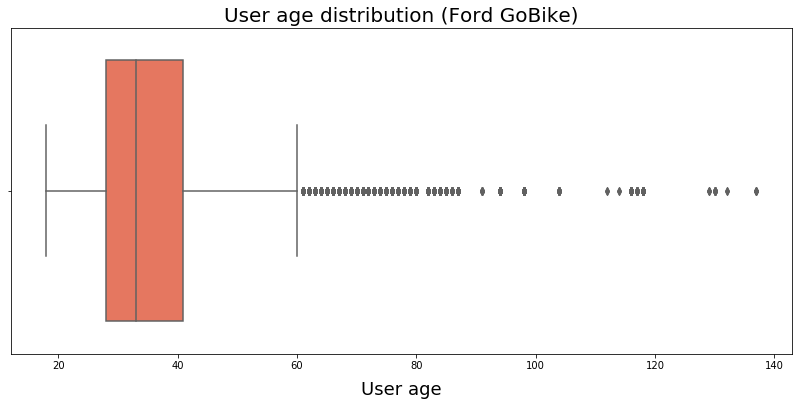

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(x='user_age', data=df, palette='Reds', orient='h')
plt.title("User age distribution (Ford GoBike)", fontsize=20)
plt.xlabel("User age", fontsize=18, labelpad=10)
plt.savefig('age_boxplot.png');

From the boxplot above it is evident that there are several outliers and entries with very high user age. It is reasoneble to assume that users older than 100 years old had their birth year entered wrongly. I will remove all user ages above 100. 

In [15]:
df = df[df['user_age']<=100]

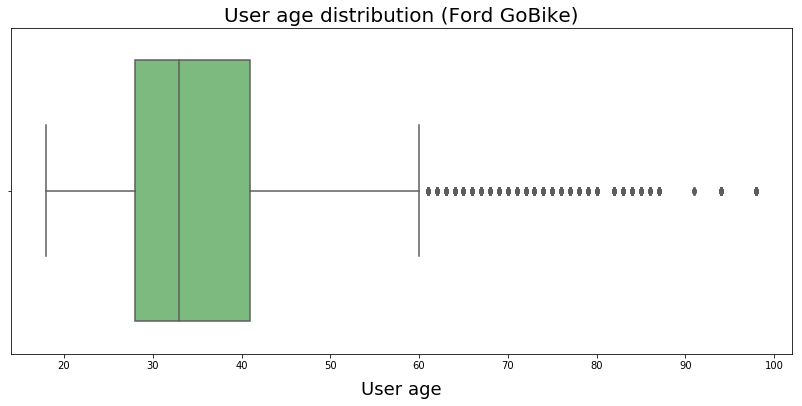

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='user_age', data=df, palette='Greens', orient='h')
plt.title("User age distribution (Ford GoBike)", fontsize=20)
plt.xlabel("User age", fontsize=18, labelpad=10)
plt.savefig('age_boxplot2.png');

There are outliers starting from around 60 years old and it seems that around 60 years of age is the maximum value (despite outliers). 

In [17]:
#average user age 

df['user_age'].mean()

35.470812624060265

### User gender 

In [18]:
#getting the gender counts 
df['member_gender'].value_counts()

Male      1540782
Female     506610
Name: member_gender, dtype: int64

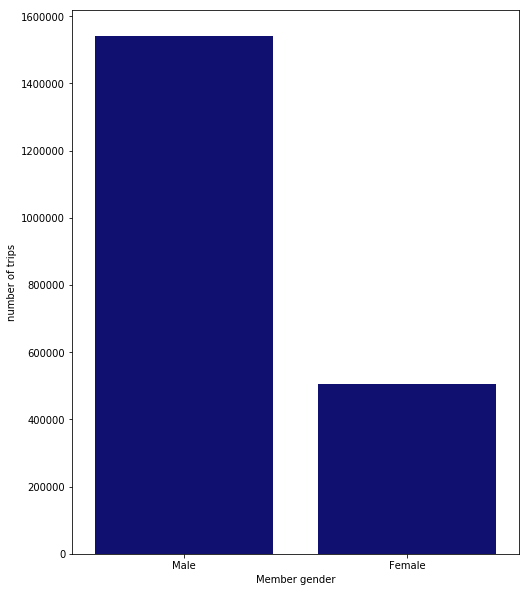

In [19]:
plt.figure(figsize=(8,10))
sns.countplot(data = df, x = 'member_gender', color = 'navy')
plt.ylabel('number of trips', fontsize=10)
plt.xlabel('Member gender')
plt.savefig('member_gender.png');

From the plot above it is clear that there are much more male users than female users of the GoBike service. There are more than 1.5 million males and only approximately 506k females using the bike-sharing system. I think this observation is quite important and it might be worth for GoBike to further explore this trend and understand why the service is dominated by one gender. 

### User type

In [20]:
df['user_type'].value_counts()

Subscriber    1815052
Customer       232340
Name: user_type, dtype: int64

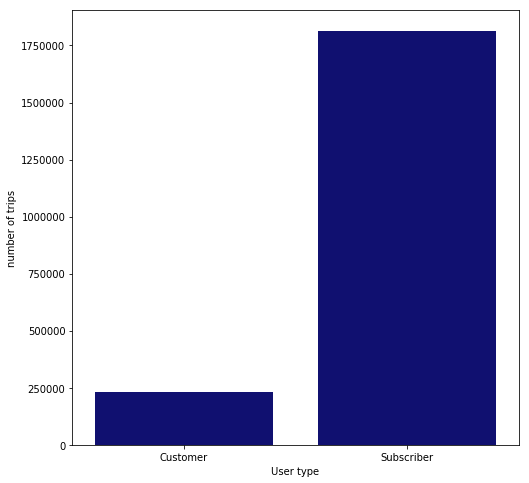

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(data = df, x = 'user_type', color = 'navy')
plt.ylabel('number of trips', fontsize=10)
plt.xlabel('User type')
plt.savefig('user_type.png');

Majority of users are subscribers of GoBike. There are 1.815.052 subscribers and 232.340 non-subscribers (customers). 
This definitely seems benefitial for the GoBike service. in the future it could be good to further explore this trend and see when the non-subscribers are converting into subscribers, or they actually never convert. 

### Most busy start station

In [22]:
#Most busy start station 
start_station_count = df.start_station_name.value_counts()
start_station_count.head()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    44605
San Francisco Caltrain (Townsend St at 4th St)               43210
San Francisco Ferry Building (Harry Bridges Plaza)           41972
Market St at 10th St                                         41358
Berry St at 4th St                                           40166
Name: start_station_name, dtype: int64

Most busy start station are *San Francisco Caltrain Station 2* and *San Francisco Caltrain Station*.

### Most busy end station

In [23]:
#most popular end station
end_station_count = df.end_station_name.value_counts()
end_station_count.head()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    57270
San Francisco Caltrain (Townsend St at 4th St)               54929
San Francisco Ferry Building (Harry Bridges Plaza)           49477
Montgomery St BART Station (Market St at 2nd St)             43929
Market St at 10th St                                         40229
Name: end_station_name, dtype: int64

Most busy end stations are the same stations: *San Francisco Caltrain Station 2* and *San Francisco Caltrain Station*.


### Extracting times and dates from timestamps

This will help with further data exploration in regard to time and dates. 

In [24]:
#converting the start_time and end_time columns to datetime format 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df = df.sort_values(by='start_time')

In [25]:

df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))


In [26]:
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')

In [27]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)

df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)

In [28]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))

df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour

In [29]:
import calendar 

df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name

df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [30]:
# now I have several new columns containing the extracted data 
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time_month,end_time_month,start_time_hour_minute,end_time_hour_minute,start_time_hour,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr
519697,240,NaN,424,48.0,37.782411,-122.392706,2nd St at S Park St,2017-06-28 09:54:41.187,1985.0,Female,...,6,6,09-06,09-06,9,9,Wednesday,Wednesday,Wed,Wed
519698,669,NaN,366,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2017-06-28 09:53:47.715,1981.0,Male,...,6,6,09-06,09-06,9,9,Wednesday,Wednesday,Wed,Wed
519699,117,NaN,188,48.0,37.782411,-122.392706,2nd St at S Park St,2017-06-28 09:52:55.338,1984.0,Male,...,6,6,09-06,09-06,9,9,Wednesday,Wednesday,Wed,Wed
519692,77,NaN,1201,9.0,37.798572,-122.400869,Broadway at Battery St,2017-06-28 10:11:00.359,1985.0,Male,...,6,6,09-06,10-06,9,10,Wednesday,Wednesday,Wed,Wed
519696,316,NaN,431,321.0,37.780146,-122.403071,5th at Folsom,2017-06-28 10:03:51.090,1973.0,Male,...,6,6,09-06,10-06,9,10,Wednesday,Wednesday,Wed,Wed


### Most popular weekday

In [31]:
#getting the number of rides per weekday 
date_counts = df.start_time_weekday.value_counts()
date_counts

Tuesday      360395
Wednesday    356527
Thursday     349971
Monday       327551
Friday       322709
Saturday     174985
Sunday       155254
Name: start_time_weekday, dtype: int64

Most of the rides took place on Tuesdays, Wednesdays and Thursdays. 

### Average trip duration  
In order to calculate duration of the trip in munutes I will need to use 'duration_sec' column and divice by 60. 

In [32]:
df['duration_minutes'] = df['duration_sec']/60

In [33]:
#average duration of ride in minutes
df['duration_minutes'].mean()

13.178758610955557

The average trip takes approximately 13 minutes. 

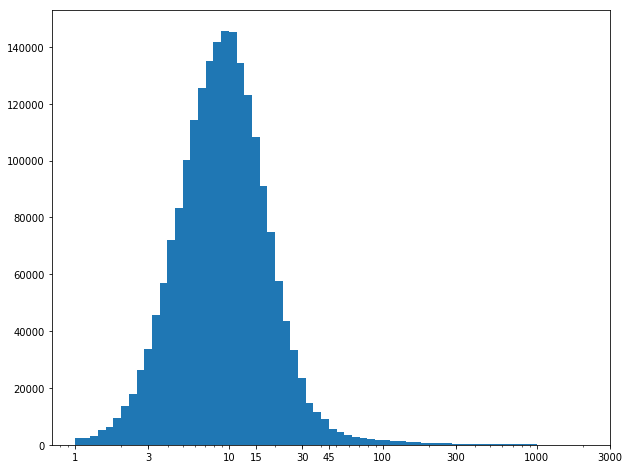

In [34]:
#plotting the histogram for average ride duration 

bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks =[1, 3, 10, 15, 30, 45, 100, 300, 1000, 3000]
labels =['{}'.format(val) for val in ticks]

plt.figure(figsize=(10,8))
plt.hist(data=df, x='duration_minutes', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels);

The histogram above shows the distribution of ride duration time. Bikes are used to travel short distances and there are significantly less rides that lasted more than 45 minutes. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Ride duration is normally distributed, user age required some transformations in order to obtain reasonable data. There were entries without user gender, which I removed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I discovered that user birth year could be entered wrongly, which led to the very high user age numbers such as 137, which is way above any logical marigin. I removed all entres where user age was higher than 100. The outliers anw hiskers of the box plot are pointing out that the maximum user age distribution is rather concentrated up to 60 years of age. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Ride duration per weekday 

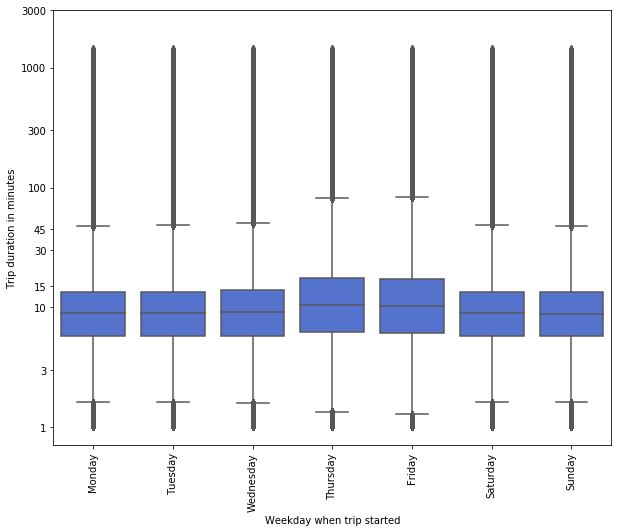

In [35]:
# plotting ride duration and weekday
df['duration_minutes'] = np.log10(df['duration_minutes'])
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = 'start_time_weekday', y = 'duration_minutes', color='royalblue')

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xlabel('Weekday when trip started')
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 15, 30, 45, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.ylabel('Trip duration in minutes')
plt.savefig('ride_duration_dayofweek.png');

Surprisingly, the bike rides during weekends are not longer than whe weekday rides. I was expecting that weekend trips could be longer and more relaxed than the rides during working days. 

### Most busy time during the day

In [36]:
#creating hourly trips df
df_hourly_trips = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()


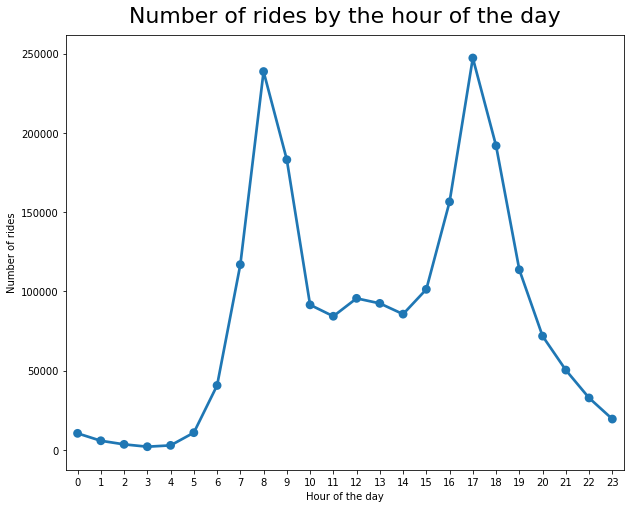

In [37]:
#plotting the pointplot
plt.figure(figsize=(10,8))
sns.pointplot(x='start_time_hour', y='bike_id', data=df_hourly_trips)
plt.title('Number of rides by the hour of the day', fontsize=22, y=1.015)
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.savefig('rides_by_hour.png');

The most busy time of the day is in the morning between 7 and 9 am and by the evening between 5 and 7 pm. 

### Growth of GoBike over time 

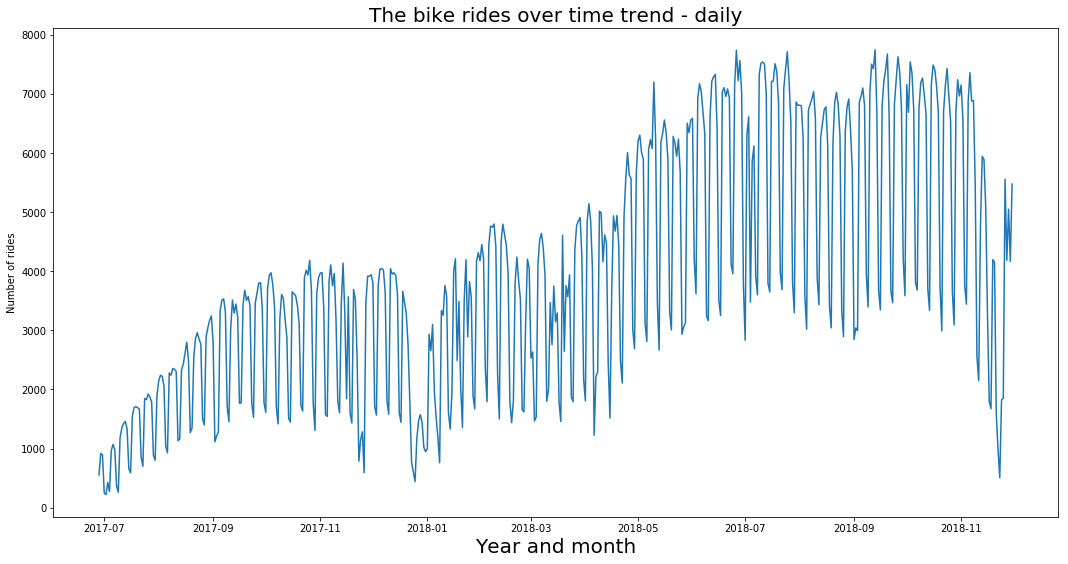

In [38]:
#plotting count of rides over time 

import matplotlib.ticker as tick

df.groupby('start_time_date').agg({'bike_id': 'count'}).plot(style='-', legend=False, figsize=(18,9))
plt.title('The bike rides over time trend - daily', fontsize=20)
plt.xlabel('Year and month', fontsize=20)
plt.ylabel('Number of rides')
ax= plt.gca()

plt.savefig('bike_rides_time_trend.png');

In July 2017 the number of daily rides was at around 1000 when in July 2018 daily rides were already at around 8000. In 12 months GoBike became more popular and increased the number of daily rides by 8 times comparing to the first month in the dataset. There is a weekly variation between the weekdays and variation between winter and summer months. 

### Monthly popularity of the bike-sharing

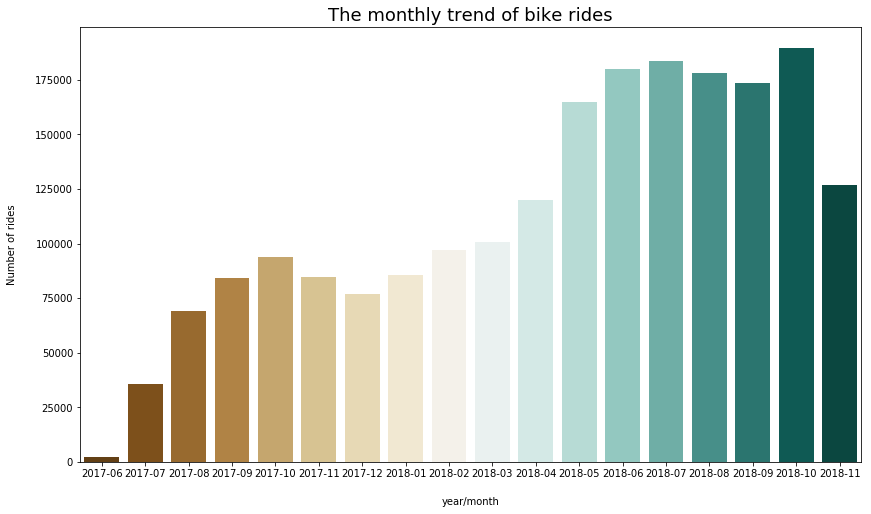

In [39]:
#plotting the monthly count of total bike rides 

plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month',palette='BrBG', data=df.sort_values(by='start_time_year_month'))
plt.title('The monthly trend of bike rides', fontsize=18)
plt.xlabel('year/month', labelpad=18)
plt.ylabel('Number of rides', labelpad=18)
ax = plt.gca()
plt.savefig('montly_trend_bike_rides.png');

Most rides took place in October 2018. The lowest number of bike rides was in June 2017. Colder months are showing a drop in the number of rides - it is probably too windy and rainy for a bike ride then.  

### Most popular bike routes

In [40]:
df_bike_routes = df.groupby(["start_station_name", "end_station_name"]).size().reset_index(name="Rides_count") 

df_bike_routes.sort_values('Rides_count', ascending=False).head()

,start_station_name,end_station_name,Rides_count
28095,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,7709
31438,The Embarcadero at Sansome St,Steuart St at Market St,5951
8937,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,5630
2392,19th Street BART Station,Grand Ave at Perkins St,4646
16683,Grand Ave at Perkins St,19th Street BART Station,4631


The most popular bike route is between San Francisco Ferry Building and The Embarco at Sansome Stataion. 

### User type and weekday correlation

The connection between weekday and type of user might help to understand who are the Subscribers and Customers. 

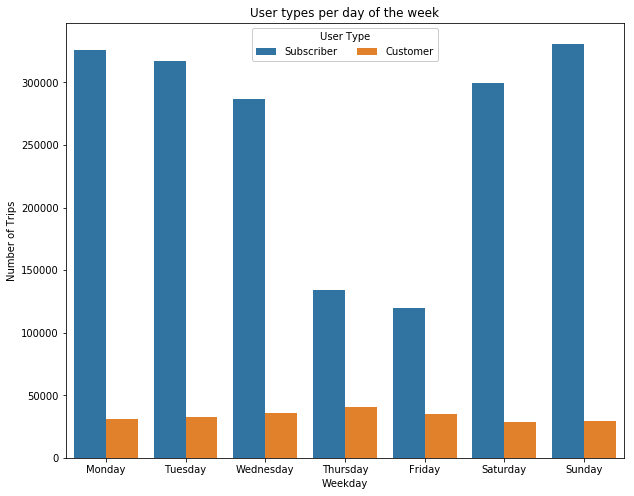

In [41]:
# plotting week day and user type
plt.figure(figsize=(10,8))
ax = sns.countplot(data = df, x = 'start_time_weekday', hue = 'user_type')
ax.legend(loc = 0, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('User types per day of the week')
plt.savefig('user_type_dayoftheweek.png');

There seem to be significantly less Subscribers towards end of the week: in Thursday and Friday, and the most Customers made trips on Thursday. This is surprising discovery as I would assume that there are more Customers during weekends (weekend trips with kids, cycling with friends) when on weekdays I would expect the same high amount of Subscribers throughout the week (cycling to work).

### User gender and weekday correlation 

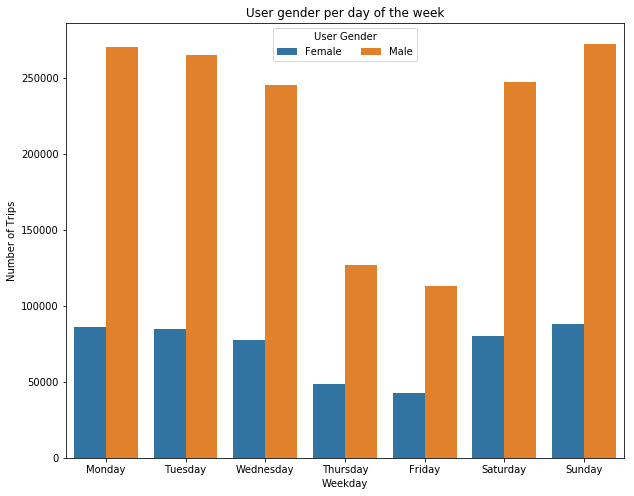

In [42]:
# plotting week day and user gender
plt.figure(figsize=(10,8))
ax = sns.countplot(data = df, x = 'start_time_weekday', hue = 'member_gender')
ax.legend(loc = 0, ncol = 2, title = 'User Gender')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('User gender per day of the week')
plt.savefig('user_gender_dayofweek.png');

The user gender shows the same trend as user type: there is a drop in number of trips mid-week (Thursday and Friday) and number of trips is rising again during weekends. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The popularity of the GoBike service is gorwing over time. It also shows some changes in number of users taking the bike trips in regard to the seasonal changes. The most busy time of the day is in the morning between 7 and 9 am and by the evening between 5 and 7 pm. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Number of trips by user gender shows the same variations in regard to the weekdays - both genders show drop in the number of taken trips in the mid-week. 
There is a difference in the behavior of Subscribers and Customers though. During the week Customers take the most trips on Thursday (mid-week) while this partof the week shows a significant drop innumbers for the Subscribers. 

## Multivariate Exploration

> In this section I will explore the connections between user types, user age groups and date and time. First I will explore the differences between Subscribers and Customers in relation the the day of the week and trip duration, next, I will investigate changes in popularity of the service among 5 main user age groups over the time (monthly). 

### Comparison of Subscribers and Customers habits:

- Day of the week 

- Trip duration

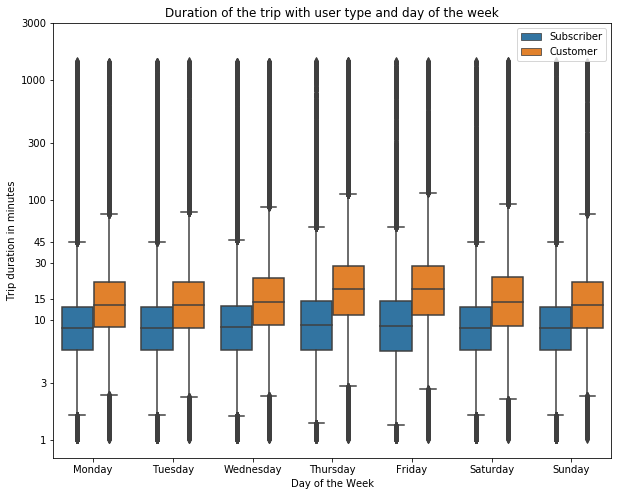

In [43]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(data = df, x = 'start_time_weekday', y = 'duration_minutes', hue = 'user_type')
plt.legend(loc = 1)

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(xticks, xlabels)

ylabels = [1, 3, 10, 15, 30, 45, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Day of the Week')
plt.ylabel('Trip duration in minutes')

plt.title('Duration of the trip with user type and day of the week')
plt.savefig('duration_usertype_dayofweek.png');

Customers usually take longer trips than Subscribers. 
The longest trips mabe by Customers take place on Thursdays and Fridays.

### User age groups and month correlation

In [44]:
df['user_age_bins'] = df['user_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else '70 - 80' if 70<x<=80
                                                  else x)

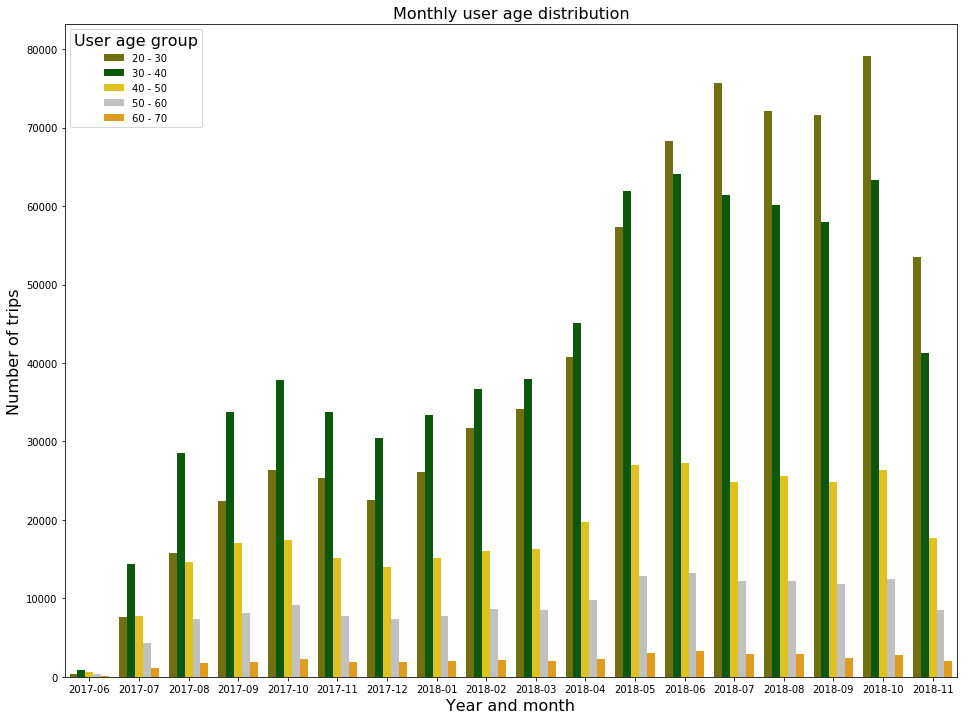

In [45]:
plt.figure(figsize=(16,12))
own_colors = {'20 - 30': 'olive', '30 - 40': 'darkgreen', '40 - 50': 'gold', '50 - 60': 'silver', '60 - 70' : 'orange'}
ax = sns.countplot(x='start_time_year_month', hue='user_age_bins', palette=own_colors, data=df[df['user_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70'])].sort_values(by=['start_time_year_month', 'user_age_bins']))
plt.title('Monthly user age distribution', fontsize=16)
plt.xlabel('Year and month', fontsize=16)
plt.ylabel('Number of trips', fontsize=16)
leg = ax.legend()
leg.set_title('User age group',prop={'size':16})
ax = plt.gca()
plt.savefig('user_age_monthly.png');

When the GoBike has launched in June 2017 the most active age group was of users between 30-40 years old. This trend has changed exactly year after, in July 2018. Since then, the most widely represented age group was of users who are between 20-30 years old. 
There are seasonal changes visible in all age groups, so in this case I think it is best to compare the same months in 2017 in 2018 with each other. 
Surprisingly in October 2017 and 2018 all age groups showed increase in numbers, even though it would be expected to be rather cold for the bike trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a visible change in the number of bike rides observed throughtout the seasons, which is natural and dependent on the temperature and weather conditions. There are also some changes among user groups dependent on the day of the week which surprisingly didn't strenghten the number of rides made by non sunscribers during the weekend. I expected the leisure rides (non-subscribers) to rise during the weekends, while this wasn't the case here. 

### Were there any interesting or surprising interactions between features?

> One of the surprising things I discovered during the exploration was the increase in the number of users in all age groups observed in October 2017. October is usually one of the colder months and such rapid growth in numbers seems unusual and I didn't expect that. 